In [1]:
import numpy as np
import scipy as ap
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [2]:
# 数学的確率
dice_data = np.array([1,2,3,4,5,6])
# 施行: 一つだけランダムに抽出する
print('施行: ', np.random.choice(dice_data, 1))

# words
# 施行結果 = 根元事象（基本事象） ex. 5
# すべての可能な根元事象を集めた集合 = 標本空間 ex. [1,2,3,4,5,6]
# 任意の部分集合 = 事象 ex. [3,4]

# 確率の公理（=仮定）
# 任意の事象 E の発生確率 = P(E) の場合、
# 1. 0 <= E <= 1を満たす
# 2. P(S) = 1 (S: 標本空間 全事象の確率)
# 3. ドモルガンの法則
# 空事象 = 要素を全く持たない集合
# 余事象 = 事象Eに属さない集合 ex. E=[1,2,3]の場合[4,5,6]
# 積事象 = 2つの事象に共通な事象
# ex. [1,2,3] & [3,4] = [3]
# 和事象 = 2つの事象の和
# ex. [1,2] & [4,5] = [1,2,4,5]

施行:  [5]


In [3]:
# 統計的確率
# サイコロを1000回振る 根本事象が1/6で起きるのかどうか
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


**条件付き確率**

- ex. 事象Aが生じた条件のもとで事象Bが生じる確率
    - = Aが与えられたもとでのBの条件付き確率
- 背景情報に基づいた確率と考えることが出来る

**独立性**

- 事象Aと事象Bが独立である = 条件付き確率とそれぞれの確率がおなじになる
- 事象Bが事象Aに影響を及ぼさない
- 成立しない場合、事象A・Bはお互いに従属する

**ベイズの定理**
- Aという結果がわかっているときに、その原因がB事象である確率を求める

```
P(B) 事象Aが起きる前の事象Bの確率 = 事前確率
P(B|A) 事象Aが起きたあとの事象Bの確率 = 事後確率
P(A|B) Aが観測されたときにBが原因であるだろう確率 = 尤度
迷惑メールの判定など実務の様々な部分で使用される
```

In [4]:
# 練習問題4-1
coin_data = np.array([0,1])
steps = 1000
tos_rolls = np.random.choice(coin_data, steps)
for i in [0,1]:
    print(i , 'が出る確率', len(tos_rolls[tos_rolls==i]) / steps)

0 が出る確率 0.488
1 が出る確率 0.512


In [5]:
# 練習問題4-2
# くじ引き
# 1000本のくじに100本のあたり
# Aくん・Bくんがともにあたりを引く確率
# 乗法定理

# 4-3 確率変数と確率分布
* 確率変数 = とりる値にたいして確率が割り当てられる変数
* サイコロ 1-6までの目 出現確率は等しく1/6が割り当てられる
* ある変数が確率的に値を取る場合、確率変数
* そして、確率変数が取りうる値を実現値と呼ぶ ex. 1,2,3,4,5,6
* 離散確率変数 = 実現値が数え上げられる、そうではないのは連続確率変数

## 分布関数
* 分布関数 = 累積確率分布関数
* 確率変数 X が実数x以下になる
* 連続確率変数の場合、分布関数の導関数を密度関数 = 確率密度関数と呼ぶ

## 期待値（平均）
* サイコロの場合、1 * 1/6 + 2 * 1/6 ...

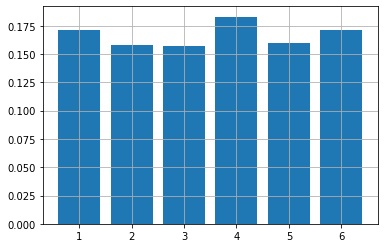

In [9]:
# 一様分布
# サイコロのように、すべての事象が起こる確率が等しいもの
calc_steps = 1000
# 1000回実施
dice_rolles = np.random.choice(dice_data, calc_steps)
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    prob_data = np.append(prob_data, p)

plt.bar(dice_data, prob_data)
plt.grid(True)

0 が出る確率 0.625
1 が出る確率 0.375


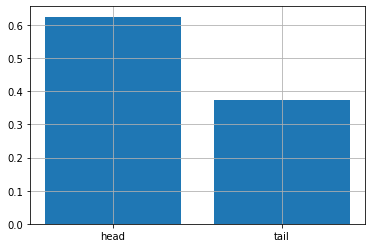

In [17]:
# ベルヌーイ分布
# 結果が２種類しかない思考をベルヌーイ試行
# 一回のベルヌーイ試行において、各事象が生じる確率
# 0: head(表)、1: tail（裏）
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1], ['head', 'tail'])
plt.grid(True)

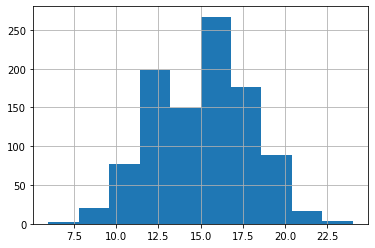

In [19]:
# 二項分布
# 独立なベルヌーイ施行をn回繰り返す
np.random.seed(0)
# 試行回数30 確率0.5 サンプル数
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

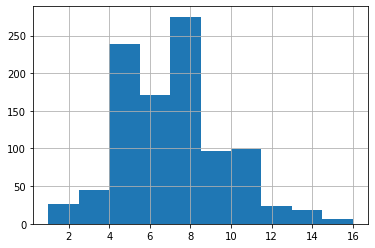

In [21]:
# ポアソン分布
# まれな事象が起きる確率
# ex. 単位面積あたりの雨粒の数、１平米あたりに生えている木の数
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

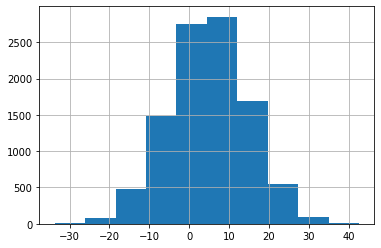

In [23]:
# 正規分布・対数正規分布
# 正規分布 = ガウス分布　代表的な連続型の確率分布
# 対数正規分布 log xが正規分布に従うときの分布
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

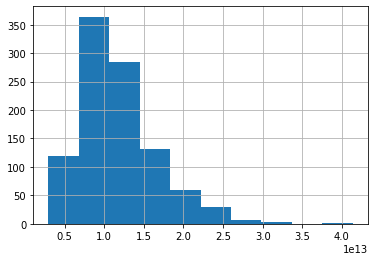

In [25]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

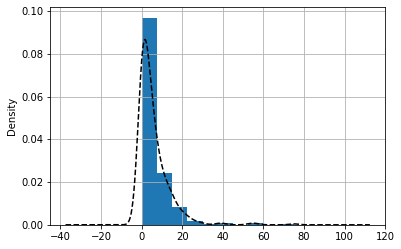

In [29]:
# カーネル密度関数
# 与えられたdataを使って、密度関数を推定する

import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

student_data_math = pd.read_csv('student-mat.csv', sep=';')

student_data_math.absences.plot(kind='kde', style='k--')
student_data_math.absences.hist(density=True)
plt.grid(True)

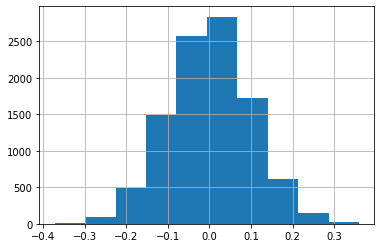

In [35]:
# 練習問題4-4
# 平均0 分散1 の正規分布からn=100の標本抽出を10,000回繰り返し、標本分布を描いて
# 残念！
# x = np.random.normal(0, 1, 10000)
# plt.hist(x)
# plt.grid(True)

N = 10000
normal_sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

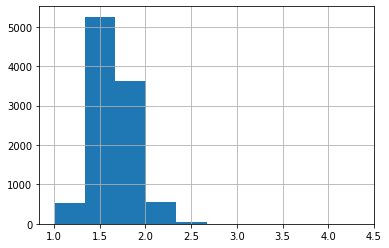

In [37]:
# 4-2 対数正規分布
# 残念！
# x = np.random.lognormal(0, 1, 10000)
# plt.hist(x)
# plt.grid(True)
N = 10000
normal_sample_data = [np.random.lognormal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

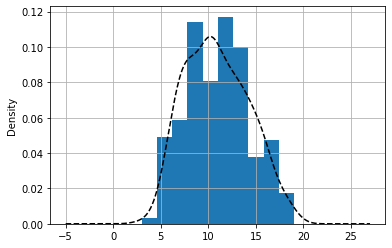

In [34]:
# 4-3 一期目の成績G1のヒストグラム・カーネル密度推定
student_data_math.G1.plot(kind='kde', style='k--')
student_data_math.G1.hist(density=True)
plt.grid(True)